In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\chand\Downloads\beer-servings.csv')

In [3]:
data


,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [4]:
data = pd.read_csv(r'C:\Users\chand\Downloads\beer-servings.csv',index_col='Unnamed: 0')

In [5]:
data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [7]:
data.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [8]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [9]:
data.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [10]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [11]:
num_cols=data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']]

In [12]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

# handling missing values

In [13]:
#method 1
#simple imputer



In [14]:
from sklearn.impute import SimpleImputer

In [15]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)

In [16]:
type(num_cols)

numpy.ndarray

In [17]:
num_cols=pd.DataFrame(num_cols,columns=[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']])

In [21]:
num_cols

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.000000,0.0,0.0,0.0
1,89.000000,132.0,54.0,4.9
2,25.000000,0.0,14.0,0.7
3,245.000000,138.0,312.0,12.4
4,217.000000,57.0,45.0,5.9
...,...,...,...,...
188,105.124324,100.0,3.0,7.7
189,111.000000,2.0,1.0,2.0
190,6.000000,0.0,0.0,0.1
191,32.000000,19.0,4.0,2.5


In [22]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [23]:
data.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],inplace=True,axis=1)

In [24]:
data=pd.concat([num_cols,data],axis=1)

In [25]:
data

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.000000,0.0,0.0,0.0,Afghanistan,Asia
1,89.000000,132.0,54.0,4.9,Albania,Europe
2,25.000000,0.0,14.0,0.7,Algeria,Africa
3,245.000000,138.0,312.0,12.4,Andorra,Europe
4,217.000000,57.0,45.0,5.9,Angola,Africa
...,...,...,...,...,...,...
188,105.124324,100.0,3.0,7.7,Venezuela,South America
189,111.000000,2.0,1.0,2.0,Vietnam,Asia
190,6.000000,0.0,0.0,0.1,Yemen,Asia
191,32.000000,19.0,4.0,2.5,Zambia,Africa


In [26]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

In [27]:
#method2

In [28]:
data = pd.read_csv(r'C:\Users\chand\Downloads\beer-servings.csv')

In [29]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [30]:
freqgraph=data.select_dtypes(include=['float'])

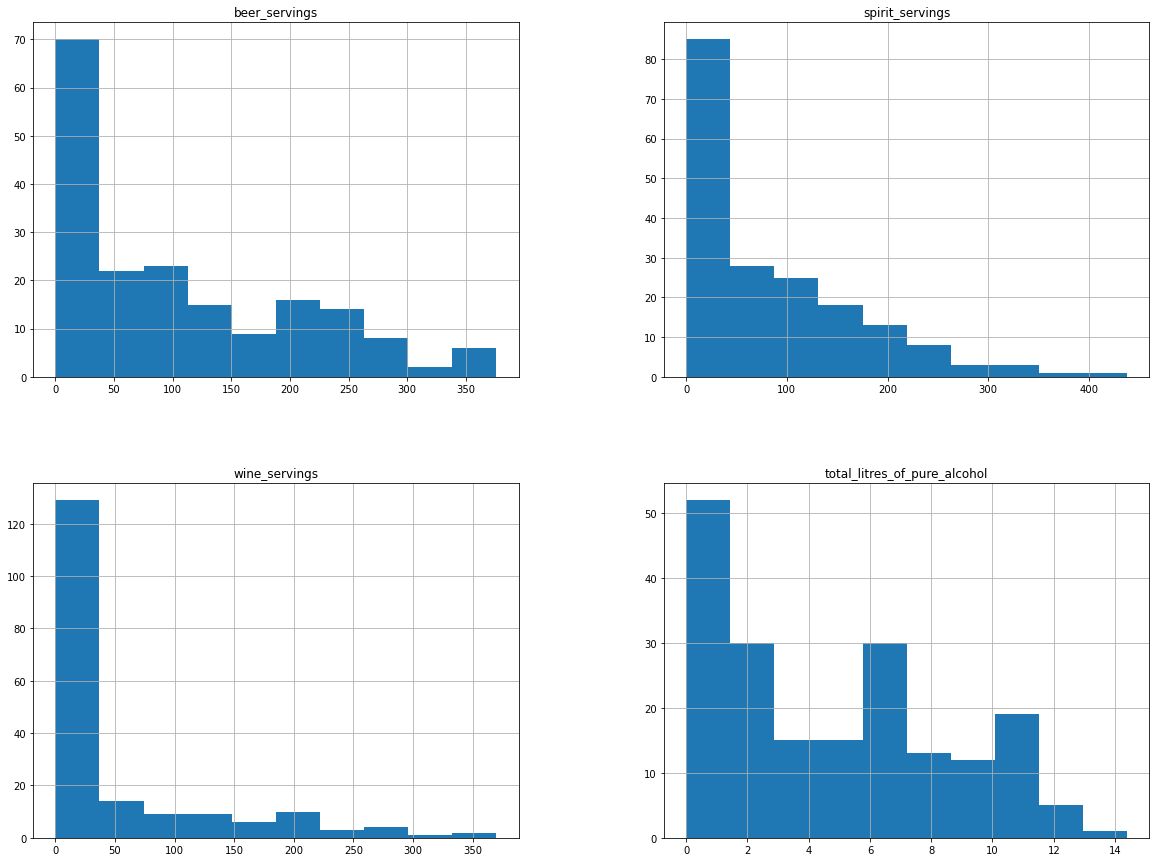

In [31]:
freqgraph.hist(figsize=(20,15))
plt.show()

In [33]:
data.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [34]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())

In [35]:
data['beer_servings'].isna().sum()

0

In [38]:
for i in ['spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol']:
    data[i]=data[i].fillna(data[i].median())

In [39]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

# handling outliers

Text(0.5, 1.0, 'boxplot of beer servings')

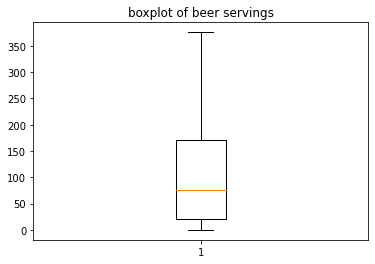

In [41]:
plt.boxplot(data['beer_servings'])
plt.title('boxplot of beer servings')

Text(0.5, 1.0, 'boxplot of spirit servings')

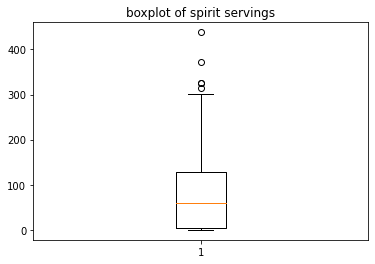

In [42]:
plt.boxplot(data['spirit_servings'])
plt.title('boxplot of spirit servings')

In [43]:
Q1=np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')

In [44]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [45]:
data['spirit_servings'].median()

60.0

In [46]:
IQR=Q3-Q1
IQR

123.0

In [47]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR


In [48]:
low_limit

-179.5

In [49]:
up_limit

312.5

In [50]:
outlier=[]
for i in data['spirit_servings']:
    if i<low_limit or i>up_limit:
        outlier.append(i)
        
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [51]:
ind=data['spirit_servings']>up_limit

In [53]:
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [54]:
data.drop([15, 68, 73, 141, 144], inplace=True)

Text(0.5, 1.0, 'boxplot of wine servings')

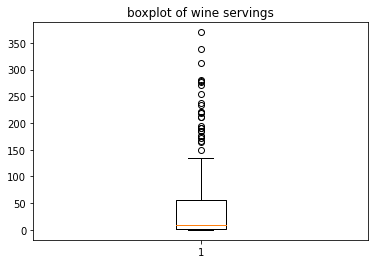

In [55]:
plt.boxplot(data['wine_servings'])
plt.title('boxplot of wine servings')

In [56]:
Q1=np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2=np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')

In [57]:
IQR=Q3-Q1
IQR

56.5

In [58]:
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print(low_limit)
print(up_limit)

-83.75
142.25


In [59]:
outlier=[]
for i in data['wine_servings']:
    if i<low_limit or i>up_limit:
        outlier.append(i)
        
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [60]:
ind=data['wine_servings']>up_limit

In [61]:
data.loc[ind].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

Text(0.5, 1.0, 'boxplot of total_litres_of_pure_alcohol')

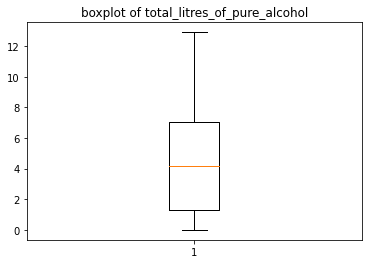

In [62]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('boxplot of total_litres_of_pure_alcohol')